#                                      Afnan Alharbi 

# Full DL Solution
---
### **Case Study:** Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

# Importing Libraries

We start by importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [3]:
path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

Now we start the exploratory data analysis.

### Shape of the data

First thing we need to know the shape of our data

**Question 1:** How many examples and features do we have?

In [4]:
nrow= data.shape[0]
ncol=data.shape[1]
print('Number of rows:',nrow,' Number of Columns:', ncol)

Number of rows: 5110  Number of Columns: 12


 We have 5110 Example, 11 Features and 1 Output

### Types of different Columns

**Question 2:** Check the type of each feature.

In [5]:
data.dtypes
# Or we can use  data.info()   to get the info 

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Dealing with categorical variables

**Question 3:** Use the .value_counts() functions to walk through the categorical variables that we have to see the categories and the counts of each of them.

In [6]:
smoking_types = data['smoking_status'].value_counts() 
smoking_types

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [7]:
residence_types =  data['Residence_type'].value_counts() 
residence_types

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [8]:
work_types = data['Residence_type'].value_counts()
work_types

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [9]:
married_types = data['ever_married'].value_counts()
married_types

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [10]:
hypertension = data['hypertension'].value_counts()
hypertension

0    4612
1     498
Name: hypertension, dtype: int64

In [11]:
heart_disease = data['heart_disease'].value_counts()
heart_disease

0    4834
1     276
Name: heart_disease, dtype: int64

In [12]:
stroke = data['stroke'].value_counts()
stroke

0    4861
1     249
Name: stroke, dtype: int64

# Preprocessing

### Dealing with Nulls

**Question 4:** The bmi column contains nulls. Fill it with the appropriate measure.

In [13]:
#To check how many null values are in bmi to choose the appropriate measure.
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
#Filling the missing data with the mean value because it's a numerical variable
data['bmi'].fillna( data['bmi'].mean(), inplace=True)

In [15]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Encoding Categorical Features

**Question 5:** Here you have to encode those categorical variables to be able to use them to train your DL model.

In [16]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['gender'] = encoder.fit_transform(data['gender'])

In [17]:
# Now we can see that the categorical variables have become numeric variables
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


### Normalizing Features

**Question 6:** Normalize the input data

In [18]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [19]:
data = data / data.max()
data.describe()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500656,0.207143,0.527154,0.097456,0.054012,0.656164,0.541928,0.508023,0.390622,0.296037,0.458969,0.048728
std,0.290125,0.246522,0.275764,0.296607,0.226063,0.475034,0.272573,0.499985,0.166643,0.078873,0.357178,0.215320
min,0.000919,0.000000,0.000976,0.000000,0.000000,0.000000,0.000000,0.000000,0.202841,0.105533,0.000000,0.000000
25%,0.243231,0.000000,0.304878,0.000000,0.000000,0.000000,0.500000,0.000000,0.284261,0.243852,0.000000,0.000000
50%,0.506334,0.000000,0.548780,0.000000,0.000000,1.000000,0.500000,1.000000,0.338136,0.290984,0.666667,0.000000
75%,0.749685,0.500000,0.743902,0.000000,0.000000,1.000000,0.750000,1.000000,0.419850,0.336066,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Removing Unnecessary Features

**Question 7:** From the features that you have, remove the feature(s) that is(are) irrelevant to your predictions.

In [20]:
data = data.drop(['id'] , axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.817073,0.0,1.0,1.0,0.50,1.0,0.841577,0.375000,0.333333,1.0
1,0.0,0.743902,0.0,0.0,1.0,0.75,0.0,0.744130,0.296037,0.666667,1.0
2,0.5,0.975610,0.0,1.0,1.0,0.50,0.0,0.389784,0.332992,0.666667,1.0
3,0.0,0.597561,0.0,0.0,1.0,0.50,1.0,0.630124,0.352459,1.000000,1.0
4,0.0,0.963415,1.0,0.0,1.0,0.75,0.0,0.640760,0.245902,0.666667,1.0


# Building the DL Model

**Question 8:** Now it's time to build the actual model, and observe a summary of it.

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(10, input_dim = 10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231 (924.00 Byte)
Trainable params: 231 (924.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

**Question 9:**  Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [24]:
### Fitting the model

**Question 10:** Split the data and train the model

We take the first columns as features and the last column as a label, then we split our dataset between training (70%) and testing (30%).

## Determining the target, and the features and dataset partitioning

In [25]:
from sklearn.model_selection import train_test_split
#get x values which is all,except the stork col.

x= data.drop(['stroke'],axis=1)

# Determining the target

y = data.iloc[:,10].values
# another option y = data['stroke']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, stratify=y)

we fit the model on 80% training data, and validate on the rest. Later we will do the final test on the test data. The training happens for 15 epochs.

In [26]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
112/112 [==============================] - 2s 5ms/step - loss: 0.5864 - accuracy: 0.6995 - precision: 0.0426 - recall: 0.2414 - val_loss: 0.3141 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
112/112 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2136 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
112/112 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2037 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
112/112 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9514 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1965 - val_accuracy: 0.9511 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
112/112 [============================

# Improving DL Models

**Question 11:** Suggest ways to improve your model

### Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

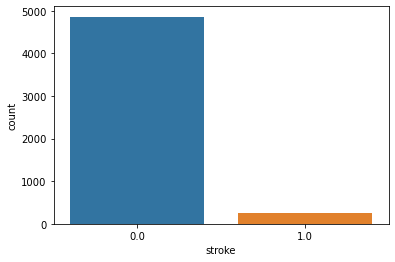

In [27]:
import seaborn as sns
sns.countplot(x='stroke', data=data )
plt.show()

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([3403.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3403.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

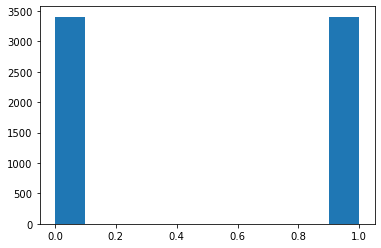

In [35]:
from imblearn.over_sampling import SMOTE

over = SMOTE()
x_new, y_new = over.fit_resample(x_train, y_train)

plt.hist([y_new])


Split the balanced dataset between 90% (training and validation), 10% testing
Then divide the 90% between 80% training and 20% validation

In [36]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x_new, y_new, test_size=0.1, stratify=y_new)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

Now we will train the model on the balanced data, and tune it on the validation set

In [37]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
154/154 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.5988 - precision: 0.7944 - recall: 0.2665 - val_loss: 0.5618 - val_accuracy: 0.7543 - val_precision: 0.7853 - val_recall: 0.6993
Epoch 2/15
154/154 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7729 - precision: 0.7856 - recall: 0.7506 - val_loss: 0.5143 - val_accuracy: 0.7706 - val_precision: 0.7368 - val_recall: 0.8415
Epoch 3/15
154/154 [==============================] - 0s 3ms/step - loss: 0.4887 - accuracy: 0.7806 - precision: 0.7568 - recall: 0.8269 - val_loss: 0.4762 - val_accuracy: 0.7665 - val_precision: 0.7309 - val_recall: 0.8431
Epoch 4/15
154/154 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7804 - precision: 0.7507 - recall: 0.8396 - val_loss: 0.4687 - val_accuracy: 0.7690 - val_precision: 0.7511 - val_recall: 0.8039
Epoch 5/15
154/154 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7853 - pr

Evaluate your model on the test set that you kept aside at the beginning.

In [38]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8076 - precision: 0.7625 - recall: 0.8944


[0.4174725413322449, 0.8076358437538147, 0.762499988079071, 0.8944281339645386]

We see that the performance gets better when our data became balanced.
Now we will try improving our model with other techniques that we learned through the week.

### Model Design

We will introduce batch normalization after each layer and then train the model

In [39]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Bat  (None, 8)                

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
154/154 [==============================] - 4s 7ms/step - loss: 0.6370 - accuracy: 0.6167 - precision: 0.6565 - recall: 0.4898 - val_loss: 0.6271 - val_accuracy: 0.6873 - val_precision: 0.6217 - val_recall: 0.9559
Epoch 2/15
154/154 [==============================] - 1s 4ms/step - loss: 0.5346 - accuracy: 0.7071 - precision: 0.6861 - recall: 0.7637 - val_loss: 0.5122 - val_accuracy: 0.7322 - val_precision: 0.6663 - val_recall: 0.9297
Epoch 3/15
154/154 [==============================] - 1s 5ms/step - loss: 0.4852 - accuracy: 0.7408 - precision: 0.7032 - recall: 0.8335 - val_loss: 0.4686 - val_accuracy: 0.7649 - val_precision: 0.6990 - val_recall: 0.9297
Epoch 4/15
154/154 [==============================] - 1s 6ms/step - loss: 0.4679 - accuracy: 0.7669 - precision: 0.7319 - recall: 0.8424 - val_loss: 0.4293 - val_accuracy: 0.7935 - val_precision: 0.7155 - val_recall: 0.9739
Epoch 5/15
154/154 [==============================] - 1s 5ms/step - loss: 0.4399 - accuracy: 0.7837 - pr

In [41]:
model.evaluate(x_test, y_test)

22/22 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8385 - precision: 0.7730 - recall: 0.9589


[0.34690409898757935,
 0.838472843170166,
 0.7730496525764465,
 0.9589442610740662]

We see that we are achieving better metrics with batch normalization.